## BDM-3035 Big Data Capstone Project

Instructor: Meysam Effati

Members:

* Ann Margeret Silva (C0903604)
* Antonio Carlos De Mello Mendes (C0866063)
* Maria Jessa Cruz (C0910329)
* Prescila Mora (C0896891)
* Rewant Sharma (C0894265)

Datasets:
* Natural Resources Canada. (2024). Canadian Forest Fire Weather Index (FWI) System. Canadian Wildland Fire Information System. Retrieved June 4, 2024, from https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi
* Natural Resources Canada. (2024). Canadian Forest Fire Behavior Prediction (FBP) System. Canadian Wildland Fire Information System. Retrieved June 4, 2024, from https://cwfis.cfs.nrcan.gc.ca/background/summary/fbp

### **Wildfire Prediction Data**

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import pymongo
import os

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
!pip install python-dotenv

  Obtaining dependency information for python-dotenv from https://files.pythonhosted.org/packages/6a/3e/b68c118422ec867fa7ab88444e1274aa40681c606d59ac27de5a5588f082/python_dotenv-1.0.1-py3-none-any.whl.metadata


In [1]:
# Load the .env file
%load_ext dotenv
%dotenv

In [21]:
# Set parameters for client connection to mongodb
connection_string = os.environ.get("MONGO_URI")
client = pymongo.MongoClient(f"{connection_string}")
print("Connection Successul")
db = client['wildfire_db_2020_2023']
collection_2020 = db['wildfire_collection_2020']
collection_2021 = db['wildfire_collection_2021']
collection_2022 = db['wildfire_collection_2022']
collection_2023 = db['wildfire_collection_2023']

Connection Successul


In [22]:
# load dataset for each year
data_wfp_2020 = pd.DataFrame(collection_2020.find())
data_wfp_2021 = pd.DataFrame(collection_2021.find())
data_wfp_2022 = pd.DataFrame(collection_2022.find())
data_wfp_2023 = pd.DataFrame(collection_2023.find())

# Concatenate datasets
data_wfp = pd.concat([data_wfp_2020, data_wfp_2021, data_wfp_2022, data_wfp_2023], ignore_index = True)

# Display the first 5 entries of the DataFrame
data_wfp.head()

,_id,lat,lon,rep_date,uid,source,sensor,satellite,agency,temp,...,estarea,pcuring,greenup,elev,sfl,cfl,tfc0,ecozone,sfc0,cbh
0,6669b15b44a41007063ba9da,62.1163,-161.8260,2020/06/02 12:54:00.000,43256707.0,NASA4,IBAND,S-NPP,UAK,15.917,...,NaN,50.0,1.0,90,1.011450,0.000000,0.35,2,0.35,NaN
1,6669b15e44a41007063ba9db,61.6291,-164.4490,2020/06/11 12:36:00.000,43256708.0,NASA5,IBAND,NOAA-20,UAK,26.064,...,NaN,50.0,1.0,24,0.435360,0.000000,0.10,2,0.10,NaN
2,6669b15e44a41007063ba9dc,47.4740,-69.9380,2020/06/20 06:30:00.000,43256709.0,USFS,IBAND,JPSS1,QC,24.666,...,NaN,29.0,1.0,27,-1.000000,0.000000,1.36,,1.36,-1.0
3,6669b15e44a41007063ba9dd,32.3920,-110.8040,2020/06/22 08:24:00.000,43256710.0,NASA6,IBAND,S-NPP,UAZ,32.754,...,NaN,50.0,1.0,1534,0.212800,0.000530,0.35,12,0.35,NaN
4,6669b15e44a41007063ba9de,33.4720,-91.3332,2020/06/13 07:06:00.000,43256711.0,NASA7,IBAND,NOAA-20,UAR,31.359,...,NaN,50.0,1.0,38,0.102444,0.000499,0.35,8,0.35,NaN


#### **Data Description**

* Describe data types, missing data, and number of rows

In [23]:
# Modify AGENCY and FUEL columns type to string to treat them as categorical values
data_wfp[["agency", "fuel", "ecozone"]]=data_wfp[["agency", "fuel", "ecozone"]].astype("str")
data_wfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450342 entries, 0 to 450341
Data columns (total 37 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   _id        450342 non-null  object 
 1   lat        450342 non-null  float64
 2   lon        450342 non-null  float64
 3   rep_date   450342 non-null  object 
 4   uid        124214 non-null  float64
 5   source     450342 non-null  object 
 6   sensor     450342 non-null  object 
 7   satellite  450342 non-null  object 
 8   agency     450342 non-null  object 
 9   temp       450342 non-null  float64
 10  rh         450342 non-null  int64  
 11  ws         450342 non-null  float64
 12  wd         450342 non-null  int64  
 13  pcp        450342 non-null  float64
 14  ffmc       450342 non-null  float64
 15  dmc        450342 non-null  float64
 16  dc         450342 non-null  float64
 17  isi        450342 non-null  float64
 18  bui        450342 non-null  float64
 19  fwi        450342 non-n

* The distribution of numerical and categorical data

In [24]:
# Describe wildfire dataset 
data_wfp.describe(include='all')

,_id,lat,lon,rep_date,uid,source,sensor,satellite,agency,temp,...,estarea,pcuring,greenup,elev,sfl,cfl,tfc0,ecozone,sfc0,cbh
count,450342,450342.000000,450342.000000,450342,1.242140e+05,450342,450342,450342,450342,450342.000000,...,28263.000000,425990.000000,425990.00000,450342.000000,450342.000000,450342.000000,450339.000000,450342,450339.000000,182649.000000
unique,450342,NaN,NaN,25187,NaN,18,6,11,64,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN
top,6669b15b44a41007063ba9da,NaN,NaN,2021/07/14 20:36:00.000,NaN,USFS,VIIRS-I,S-NPP,SK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
freq,1,NaN,NaN,2571,NaN,131749,242632,214352,39275,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78769,NaN,NaN
mean,NaN,47.087916,-110.010441,NaN,4.331366e+07,NaN,NaN,NaN,NaN,23.058456,...,47.226963,49.936846,0.72128,701.436197,9.556830,0.371298,2.151030,NaN,1.878887,5.125306
std,NaN,11.865684,18.039074,NaN,3.697741e+04,NaN,NaN,NaN,NaN,7.093647,...,41.258084,31.819724,0.44837,657.176444,15.913778,0.620658,1.849023,NaN,1.547191,3.100689
min,NaN,25.000200,-165.826004,NaN,4.325090e+07,NaN,NaN,NaN,NaN,-45.268002,...,0.000000,0.000000,0.00000,-1.000000,-1.000000,-1.000000,0.000000,NaN,0.000000,-1.000000
25%,NaN,36.105900,-120.730756,NaN,4.328195e+07,NaN,NaN,NaN,NaN,19.127000,...,21.354000,25.000000,0.00000,264.000000,0.569385,0.001207,0.350000,NaN,0.350000,3.697240
50%,NaN,50.065950,-110.498692,NaN,4.331301e+07,NaN,NaN,NaN,NaN,23.712999,...,35.912800,50.000000,1.00000,424.000000,4.648921,0.241934,1.660000,NaN,1.440000,4.651320
75%,NaN,56.220001,-96.537003,NaN,4.334406e+07,NaN,NaN,NaN,NaN,27.944000,...,65.378200,75.000000,1.00000,1021.000000,14.686516,0.601541,3.650000,NaN,3.250000,6.294507


In [86]:
data_wfp.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,450304.0,47.089129,11.865234,25.000200,36.107160,50.067051,56.220730,7.055800e+01
lon,450304.0,-110.010989,18.039496,-165.826004,-120.731000,-110.501439,-96.537000,-5.298500e+01
temp,450304.0,23.060342,7.090346,-45.268002,19.128000,23.712999,27.944000,4.842600e+01
rh,450304.0,36.682506,15.418176,0.000000,26.000000,35.000000,46.000000,9.900000e+01
ws,450304.0,13.956694,5.922535,0.000000,9.662000,12.803000,16.996000,9.358000e+01
wd,450304.0,196.807761,95.639107,0.000000,135.000000,210.000000,271.000000,3.600000e+02
pcp,450304.0,0.534125,2.785240,0.000000,0.000000,0.002000,0.122000,9.668600e+01
ffmc,450304.0,89.127680,7.646224,0.000000,87.088000,90.650002,93.303001,9.900000e+01
dmc,450304.0,95.268387,97.462898,0.000000,34.112000,68.557999,112.568001,9.093470e+02
dc,450304.0,417.019067,275.859576,0.000000,214.918254,381.696503,546.989990,2.707040e+03


In [25]:
data_wfp.columns

Index(['_id', 'lat', 'lon', 'rep_date', 'uid', 'source', 'sensor', 'satellite',
       'agency', 'temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc', 'dc', 'isi',
       'bui', 'fwi', 'fuel', 'ros', 'sfc', 'tfc', 'bfc', 'hfi', 'cfb',
       'estarea', 'pcuring', 'greenup', 'elev', 'sfl', 'cfl', 'tfc0',
       'ecozone', 'sfc0', 'cbh'],
      dtype='object')

#### **Data Wrangling/Encoding:**
* Data inspection
* Handling missing values
* Outlier detection
* Data transformation

#### Data Inspection

In [26]:
# Check for missing values
data_wfp.isna().T

,0,1,2,3,4,5,6,7,8,9,...,450332,450333,450334,450335,450336,450337,450338,450339,450340,450341
_id,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
lon,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
rep_date,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
uid,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
source,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sensor,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
satellite,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
agency,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
temp,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# Looking for columns with missing values
data_wfp.isnull().sum()

_id               0
lat               0
lon               0
rep_date          0
uid          326128
source            0
sensor            0
satellite         0
agency            0
temp              0
rh                0
ws                0
wd                0
pcp               0
ffmc              0
dmc               0
dc                0
isi               0
bui               0
fwi               0
fuel              0
ros               3
sfc               3
tfc               3
bfc          211210
hfi               3
cfb               3
estarea      422079
pcuring       24352
greenup       24352
elev              0
sfl               0
cfl               0
tfc0              3
ecozone           0
sfc0              3
cbh          267693
dtype: int64

In [28]:
# Checking values in columns
data_wfp[['satellite']].groupby(['satellite']).all()

""
satellite
""
Aqua
JPSS1
METOP-A
METOP-B
NOAA-15
NOAA-18
NOAA-19
NOAA-20


In [30]:
data_wfp[['agency', 'uid']].groupby(['agency']).count()

,uid
agency,
-,7759
AB,1378
BC,710
M,713
MB,6834
...,...
UWA,1171
UWI,139
UWV,76


#### Treating missing values for columns, checking and removing for duplicates

In [31]:
# Handling missing values

# Filling missing values with median and mean
data_wfp['bfc'].fillna(data_wfp['bfc'].median(), inplace = True)
data_wfp['cbh'].fillna(data_wfp['cbh'].mean(), inplace = True)
data_wfp['pcuring'].fillna(data_wfp['pcuring'].mean(), inplace = True)
data_wfp['greenup'].fillna(data_wfp['greenup'].mean(), inplace = True)

data_wfp['ros'].fillna(data_wfp['ros'].median(), inplace = True)
data_wfp['sfc'].fillna(data_wfp['sfc'].median(), inplace = True)
data_wfp['tfc'].fillna(data_wfp['tfc'].median(), inplace = True)
data_wfp['hfi'].fillna(data_wfp['hfi'].median(), inplace = True)
data_wfp['tfc0'].fillna(data_wfp['tfc0'].median(), inplace = True)
data_wfp['sfc0'].fillna(data_wfp['sfc0'].median(), inplace = True)

# Set to zero for no fire
data_wfp['cfb'].fillna(0, inplace = True)

# Dropping irrelevant columns 
data_wfp.drop(columns=['_id'], axis = 1, inplace=True)

# Dropping columns with missing values
data_wfp.drop(columns=['uid', 'estarea'], axis = 1, inplace=True)

# Displaying the first 5 entries of df_pat Dataframe
data_wfp.head()

,lat,lon,rep_date,source,sensor,satellite,agency,temp,rh,ws,...,cfb,pcuring,greenup,elev,sfl,cfl,tfc0,ecozone,sfc0,cbh
0,62.1163,-161.8260,2020/06/02 12:54:00.000,NASA4,IBAND,S-NPP,UAK,15.917,69,10.112,...,0.0,50.0,1.0,90,1.011450,0.000000,0.35,2,0.35,5.125306
1,61.6291,-164.4490,2020/06/11 12:36:00.000,NASA5,IBAND,NOAA-20,UAK,26.064,52,9.809,...,0.0,50.0,1.0,24,0.435360,0.000000,0.10,2,0.10,5.125306
2,47.4740,-69.9380,2020/06/20 06:30:00.000,USFS,IBAND,JPSS1,QC,24.666,54,8.816,...,0.0,29.0,1.0,27,-1.000000,0.000000,1.36,,1.36,-1.000000
3,32.3920,-110.8040,2020/06/22 08:24:00.000,NASA6,IBAND,S-NPP,UAZ,32.754,11,8.963,...,0.0,50.0,1.0,1534,0.212800,0.000530,0.35,12,0.35,5.125306
4,33.4720,-91.3332,2020/06/13 07:06:00.000,NASA7,IBAND,NOAA-20,UAR,31.359,37,13.951,...,0.0,50.0,1.0,38,0.102444,0.000499,0.35,8,0.35,5.125306


In [32]:
# Checking for and remove duplicate rows
data_wfp = data_wfp.drop_duplicates()

In [33]:
# Checking for missing values again
data_wfp.isnull().sum()

lat          0
lon          0
rep_date     0
source       0
sensor       0
satellite    0
agency       0
temp         0
rh           0
ws           0
wd           0
pcp          0
ffmc         0
dmc          0
dc           0
isi          0
bui          0
fwi          0
fuel         0
ros          0
sfc          0
tfc          0
bfc          0
hfi          0
cfb          0
pcuring      0
greenup      0
elev         0
sfl          0
cfl          0
tfc0         0
ecozone      0
sfc0         0
cbh          0
dtype: int64

In [34]:
# Checking for missing values again
data_wfp.isnull().sum().sum()

0

#### Visualizing Outliers

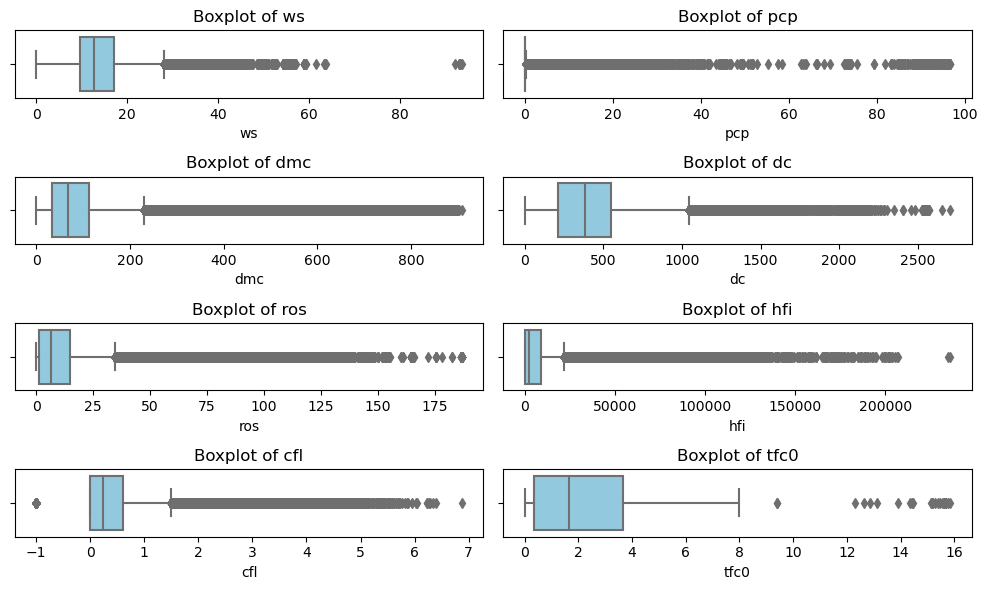

In [58]:
# Select columns for visualization
columns_to_visualize = ['ws', 'pcp', 'dmc', 'dc', 'ros', 'hfi', 'cfl', 'tfc0']

# Calculate the number of rows and columns for the subplot grid
num_columns = len(columns_to_visualize)
num_rows = int(np.ceil(num_columns / 2))

# Create a subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 6))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Iterate over columns and create boxplots
for i, column in enumerate(columns_to_visualize):
    sns.boxplot(x=data_wfp[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#### Data Preprocessing

* Defining labels for the target variable Fire_Type according to general description of the fire based on Crown Fraction Burned (CFB)

In [36]:
def FireType(cfb):
    if cfb == 0:
        return "no fire"
    elif cfb < 10:
        return "surface fire"
    elif cfb >= 90:
        return "continuous crown fire"
    elif 10 <= cfb <= 90:
        return "intermittent crown fire"
         

# Apply FireType function using lambda function
data_wfp['Fire_Type'] = data_wfp['cfb'].apply(lambda ft: FireType(ft))
data_wfp.head()

,lat,lon,rep_date,source,sensor,satellite,agency,temp,rh,ws,...,pcuring,greenup,elev,sfl,cfl,tfc0,ecozone,sfc0,cbh,Fire_Type
0,62.1163,-161.8260,2020/06/02 12:54:00.000,NASA4,IBAND,S-NPP,UAK,15.917,69,10.112,...,50.0,1.0,90,1.011450,0.000000,0.35,2,0.35,5.125306,no fire
1,61.6291,-164.4490,2020/06/11 12:36:00.000,NASA5,IBAND,NOAA-20,UAK,26.064,52,9.809,...,50.0,1.0,24,0.435360,0.000000,0.10,2,0.10,5.125306,no fire
2,47.4740,-69.9380,2020/06/20 06:30:00.000,USFS,IBAND,JPSS1,QC,24.666,54,8.816,...,29.0,1.0,27,-1.000000,0.000000,1.36,,1.36,-1.000000,no fire
3,32.3920,-110.8040,2020/06/22 08:24:00.000,NASA6,IBAND,S-NPP,UAZ,32.754,11,8.963,...,50.0,1.0,1534,0.212800,0.000530,0.35,12,0.35,5.125306,no fire
4,33.4720,-91.3332,2020/06/13 07:06:00.000,NASA7,IBAND,NOAA-20,UAR,31.359,37,13.951,...,50.0,1.0,38,0.102444,0.000499,0.35,8,0.35,5.125306,no fire


#### Correlation within features
* Exploring the correlation within features and the target variable
* Upon analize the frequency counts for Agencies of Alberta and British Columbia and Fire Type as a target variable.
* 'Fire Type' feature is categorical that represents the behaviour if is no fire, surface, continuous or intermittent crown fire according to the rating of the moisture content in litter and other cured fine fuels (FFMC).

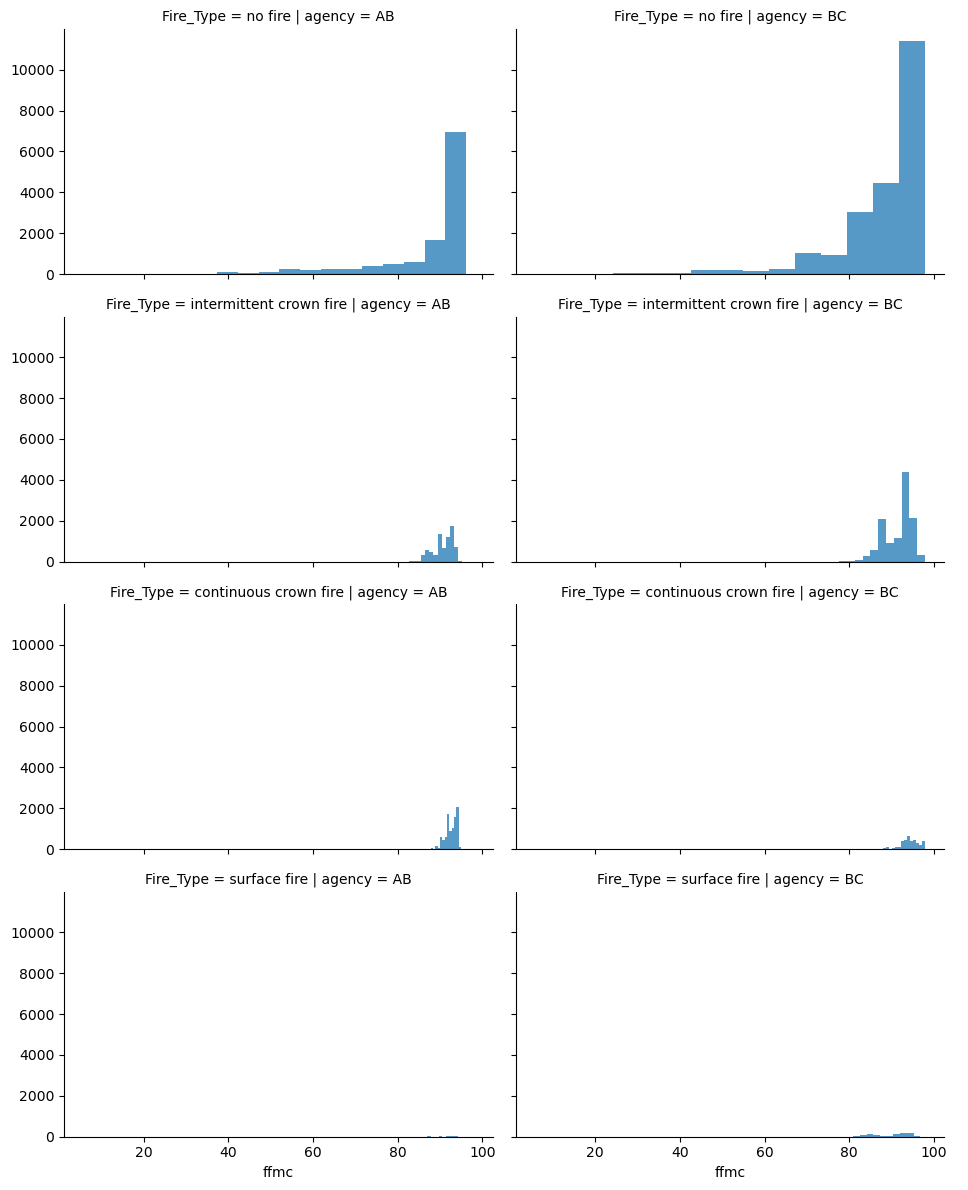

In [37]:
grid = sns.FacetGrid(data_wfp[data_wfp['agency'].isin(['AB', 'BC'])], col='agency', row='Fire_Type', aspect=1.6)
grid.map(plt.hist, 'ffmc', alpha=.75, bins=15)
grid.add_legend()

* The temperature can influence the ignition of fire according to the following distribution.

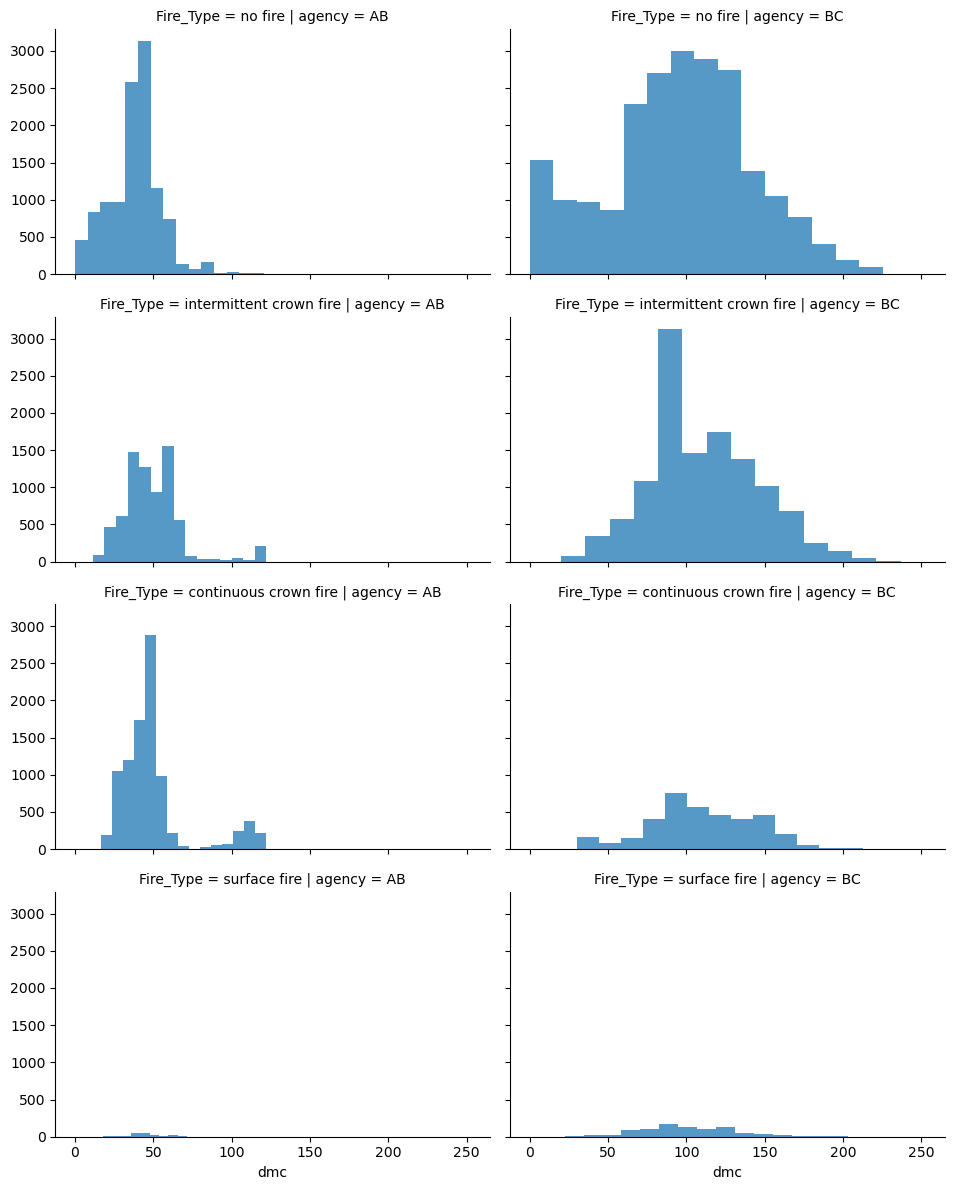

In [88]:
grid = sns.FacetGrid(data_wfp[data_wfp['agency'].isin(['AB', 'BC'])], col='agency', row='Fire_Type', aspect=1.6)
grid.map(plt.hist, 'dmc', alpha=.75, bins=15)
grid.add_legend()

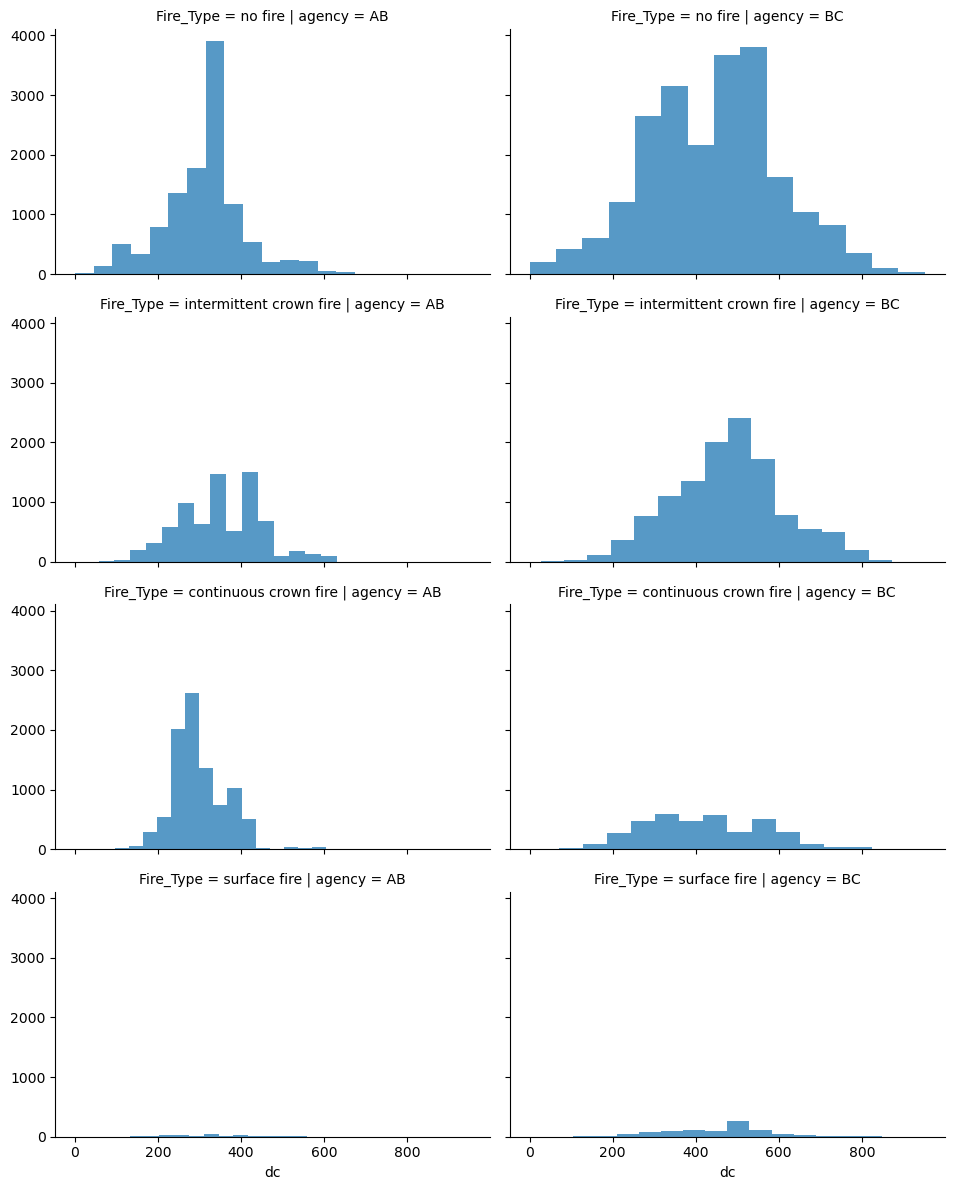

In [90]:
grid = sns.FacetGrid(data_wfp[data_wfp['agency'].isin(['AB', 'BC'])], col='agency', row='Fire_Type', aspect=1.6)
grid.map(plt.hist, 'dc', alpha=.75, bins=15)
grid.add_legend()

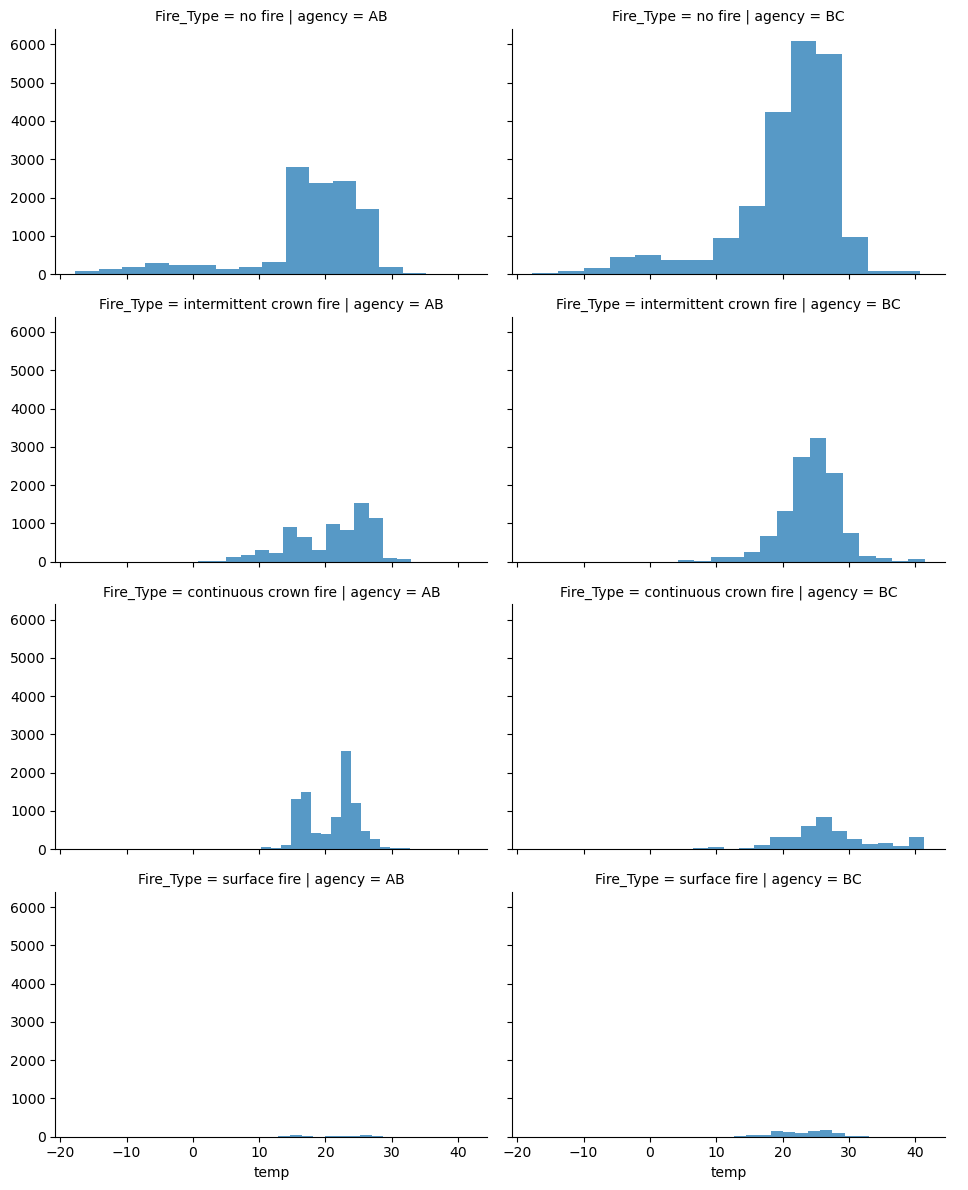

In [38]:
grid = sns.FacetGrid(data_wfp[data_wfp['agency'].isin(['AB', 'BC'])], col='agency', row='Fire_Type', aspect=1.6)
grid.map(plt.hist, 'temp', alpha=.75, bins=15)
grid.add_legend()

* The number of fire events has occurred more often than non-fire events in Alberta and Bitish Columbia

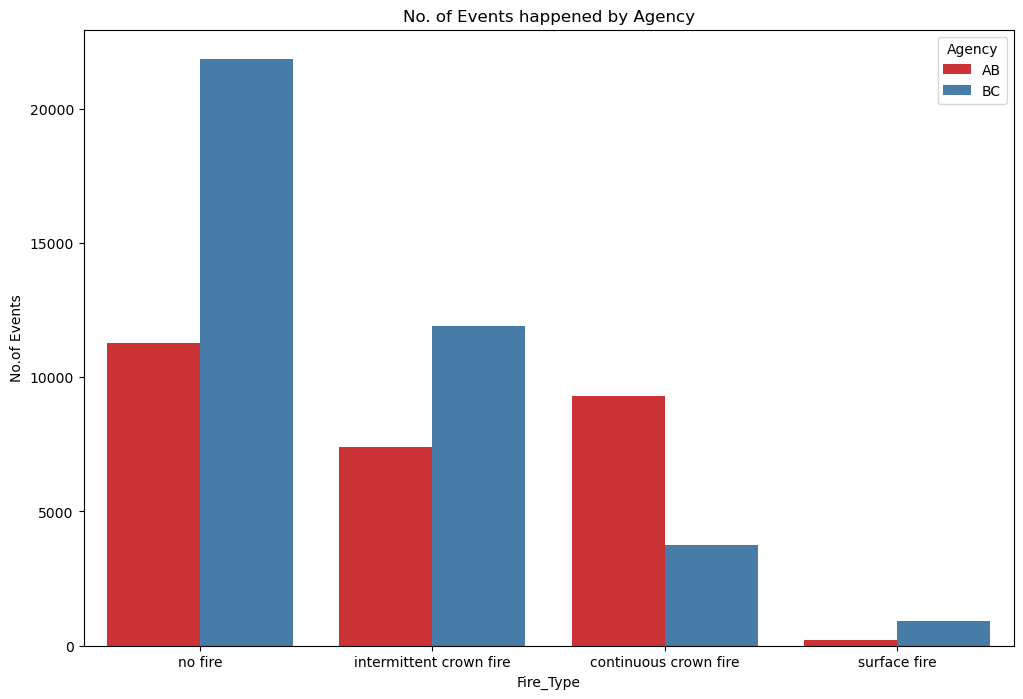

In [72]:
data_agency = data_wfp[data_wfp['agency'].isin(['AB', 'BC'])]  
    
plt.figure(figsize=(12,8))
axis = sns.countplot(x = "Fire_Type", hue = "agency", palette = "Set1", data = data_agency)
axis.set(title = "No. of Events happened by Agency", xlabel = "Fire_Type",ylabel = "No.of Events")
plt.legend(loc='upper right', title='Agency')
plt.show()

* As the Crown Fraction Burned (CFB) feature is time series data, we can quantify the severity of the fire, not only classifying what kind of fire it is but also distributing it as follows. Therefore, we will be using CFB as the target variable.

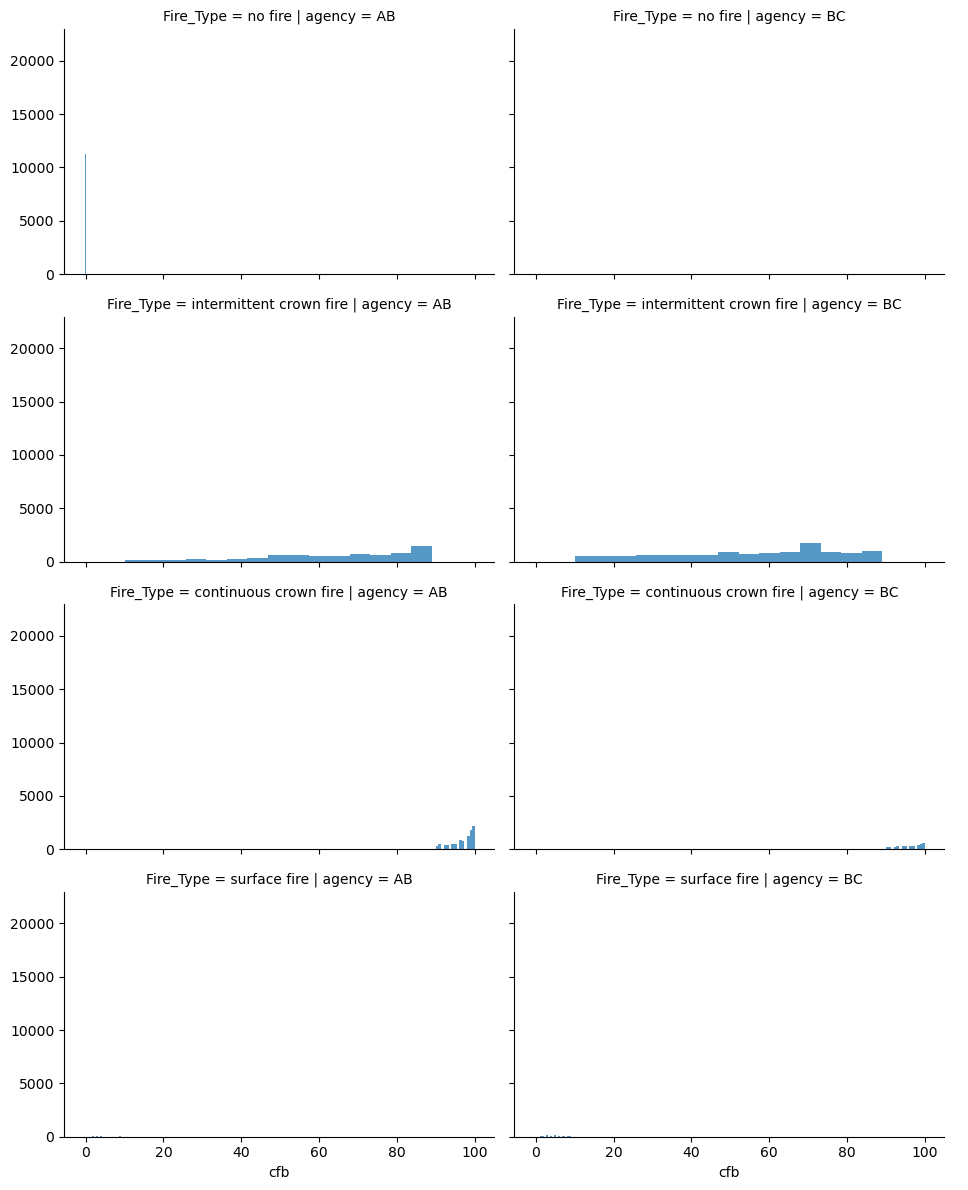

In [73]:
grid = sns.FacetGrid(data_wfp[data_wfp['agency'].isin(['AB', 'BC'])], col='agency', row='Fire_Type', aspect=1.6)
grid.map(plt.hist, 'cfb', alpha=.75, bins=15)
grid.add_legend()

#### **Feature Engineering:**

* Handling Categorical Data

In [74]:
# Convert class label to numbers
data_agency['agency'] = data_agency['agency'].map({'AB':0, 'BC':1})

# Drop the other categorical variables
data_agency = data_agency.drop(['rep_date','source', 'sensor', 'satellite', 'fuel', 'ecozone', 'Fire_Type'], axis = 1)

C:\Users\ancar\AppData\Local\Temp\ipykernel_13772\3493052552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agency['agency'] = data_agency['agency'].map({'AB':0, 'BC':1})


* Data normalization and scaling 

In [75]:
# Using standardization for scaling other features

# For numeric columns
numeric_cols = ['ws', 'pcp', 'dmc', 'dc', 'ros', 'hfi', 'cfl', 'tfc0']

for column in numeric_cols:
  data_agency[numeric_cols] = (data_agency[numeric_cols] - data_agency[numeric_cols].mean()) / data_agency[numeric_cols].std()

data_agency.tail()

,lat,lon,agency,temp,rh,ws,wd,pcp,ffmc,dmc,...,hfi,cfb,pcuring,greenup,elev,sfl,cfl,tfc0,sfc0,cbh
450328,58.522339,-119.981682,0,15.137000,45,-0.517295,267,1.689959,76.753998,-0.368622,...,-0.885520,0.0,49.936846,0.72128,422,9.949460,-0.685247,-0.325748,2.32,5.125306
450335,56.342049,-119.202568,0,25.420000,25,0.091523,256,-0.185569,92.891998,-0.326621,...,-0.185246,78.0,49.936846,0.72128,624,9.323910,-1.199278,-0.198082,2.20,5.125306
450337,56.340000,-119.229897,0,25.278999,25,0.093213,256,-0.185569,92.876000,-0.337684,...,-0.192426,62.0,49.936846,0.72128,640,5.329375,-1.199654,-0.245117,2.19,5.125306
450339,56.339291,-119.209106,0,25.422001,25,0.092030,256,-0.185569,92.898003,-0.325947,...,-0.134676,80.0,49.936846,0.72128,624,8.216022,-0.904438,-0.191363,2.20,5.125306
450340,56.049808,-116.394592,0,25.267000,24,-0.322581,202,-0.080695,92.988998,-0.852036,...,-0.183685,73.0,49.936846,0.72128,733,17.867018,-0.992572,-0.285432,2.00,5.125306


* Using CFB as the Target variable

In [79]:
# Set cfb as the target
data_agency['Target'] = data_agency['cfb']

# Drop cfb feature 
data_agency = data_agency.drop(['cfb'], axis = 1)

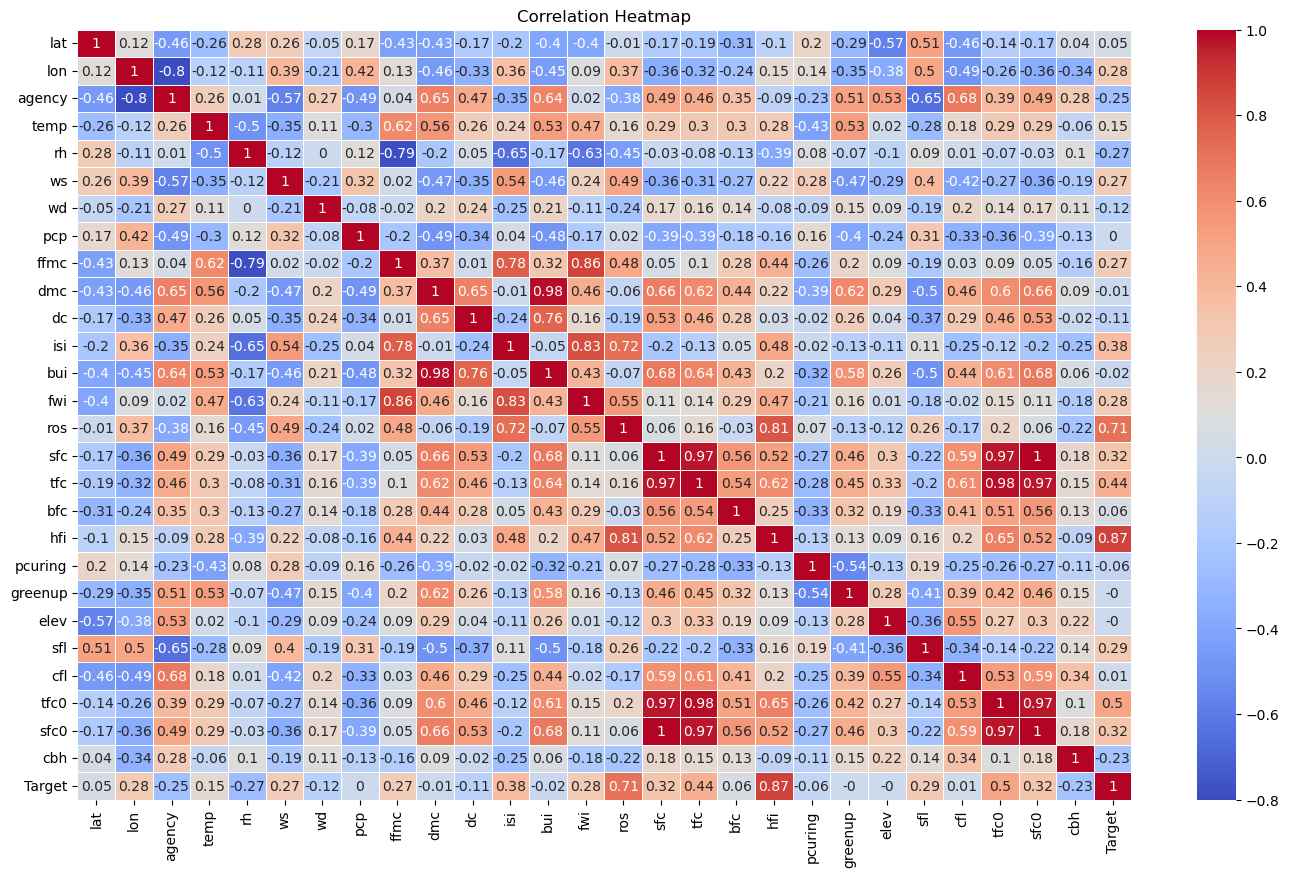

In [80]:
# Detecting multicollinearity to stop data leakage

# Compute the correlation matrix between all features
correlation_matrix = data_agency.corr(method='spearman').round(2)

plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidth = 0.5, annot=True)
plt.title('Correlation Heatmap')
plt.show()

* Feature Selection using Variance Inflation Factor

In [81]:
# Split the data into input variables and target variables
X = data_agency.drop('Target', axis = 1) # Input variables
y = data_agency['Target'] # Target variable

In [82]:
# Check multicollinearity using variance inflation factor to find the higher vif rate, e.g., year and BUI have the highest rate)
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = pd.DataFrame()

df_vif['feature'] = X.columns
df_vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif

C:\Users\ancar\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,vif
0,lat,1134.759438
1,lon,1921.912733
2,agency,14.948013
3,temp,40.943602
4,rh,27.303477
5,ws,5.085084
6,wd,6.589488
7,pcp,1.209435
8,ffmc,493.283190
9,dmc,90.936688


* The 'lon', 'lat', 'bui', 'ffmc', 'tfc' columns contain the highest vif values. This means that we may drop these features as input variables to the model

In [83]:
# Split the dataset into Train and Test
from sklearn.model_selection import train_test_split

# Split the model with parameter test_size as 0.38 when the test dataset is small
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.38, random_state=42)

* Analyze dimensionality reduction using Principal Component Analysis (PCA)

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10) #Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Check how much variance is explained by each of the principal components
print("Score:", pca.explained_variance_ratio_)

Score: [0.29481323 0.1845738  0.09579856 0.06461087 0.05653055 0.04012975
 0.03707281 0.03477559 0.0328986  0.02660898]


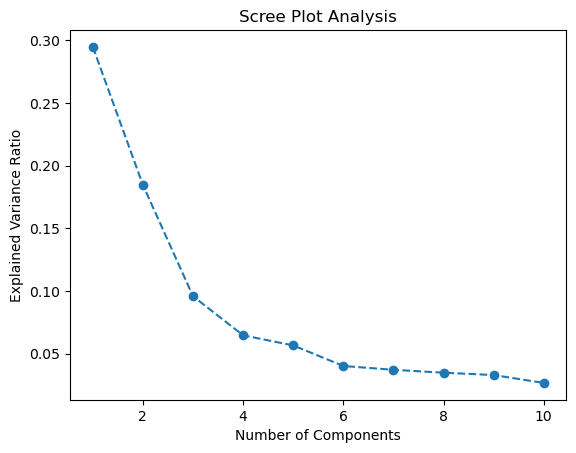

In [85]:
# Visualizing the results of eigenvalues (variances explained by each principal component)
import matplotlib.pyplot as plt

plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot Analysis')
plt.show()

* The location of the elbow guides the decision on how many principal components to retain, specifically focusing on where the elbow occurs, indicating to be between 5 and 7 components capture the majority of the variation.
